In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [66]:
#df_pheno = pd.read_excel("geno_pheno_match.xlsx",sheet_name='pheno',header=0,index_col=0,converters={'Plot':str})
df_pheno = pd.read_csv("all_zscore.phenotype",sep='\t', header=0)
df_pheno.head(2)

,geno_id,mean_T0,mean_T1,RTI
0,Pulse.30K-0043-06-81|33005-CH22.HTRCxCDB22C,-1.235003,-0.713519,0.391322
1,Pulse.30K-0043-06-86|33010-CH22.HTRCxCDB22C,-0.521683,-0.062180,0.257875


In [3]:
df_geno = pd.read_excel("geno_pheno_match.xlsx",sheet_name='Filled-in',header=0)
df_geno.head(2)

,SNP Name,#CHROM,POS,REF,ALT,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-86|6018-CA22.DVRS,Pulse.30K-0043-21-87|6019-CA22.DVRS,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS
0,AVR-Ca-00001.01-001083977,1,1083977,G,A,1|1,1|1,1|1,0|0,1|1,...,0|0,0|0,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0
1,AVR-Ca-00002.01-001084247,1,1084247,T,C,1|1,1|1,1|1,0|0,1|1,...,0|0,0|0,0|0,1|1,0|0,0|0,0|0,0|0,0|0,0|0


In [4]:
df_match = pd.read_excel("geno_pheno_match.xlsx",sheet_name='geno_pheno_id',header=0)
df_match.head(2)

,geno_id,geno,plot_id,category
0,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar
1,Pulse.30K-0043-20-02|1001-Almaz,Pulse.30K-0043-20-02,1001,cultivar


In [5]:
df_SNP = pd.read_excel("geno_pheno_match.xlsx",sheet_name='tolerant_allele',header=0)
df_SNP.head(2)

,SNP,CHROM,POS,REF,ALT,Effect,SE,p-value
0,AVR-Ca-04095.07-035905336,7,35905336,G,A,-12.704080,2.000614,2.370000e-10
1,AVR-Ca-04052.07-033061912,7,33061912,C,A,-9.860109,2.145887,9.520000e-06


In [7]:
SNP_list = df_SNP['SNP'].to_list()
SNP_list

['AVR-Ca-04095.07-035905336',
 'AVR-Ca-04052.07-033061912',
 'AVR-Ca-04054.07-033164344',
 'AVR-Ca-00218.01-003207173',
 'AVR-Ca-02871.06-028973740',
 'AVR-Ca-02882.06-029385813']

In [13]:
df = df_geno[df_geno['SNP Name'].isin(SNP_list)]
df = df.T
df = df.reset_index()
df.shape

(1123, 7)

In [16]:
df.columns=df.iloc[0]
df = df.iloc[1:]
df.head(10)

,SNP Name,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336
1,#CHROM,1,6,6,7,7,7
2,POS,3207173,28973740,29385813,33061912,33164344,35905336
3,REF,A,C,C,C,C,G
4,ALT,G,T,T,A,A,A
5,Pulse.30K-0043-04-01|PBA-Hatrick,1|0,0|0,0|0,0|0,1|1,0|0
6,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,1|1,0|0,0|0,1|1,0|0,1|1
7,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0
8,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,1|1,1|1,1|1,1|1,0|0,1|1
9,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0
10,Pulse.30K-0043-04-06|21016-CH22.HTRCxCDB22C,1|1,0|0,0|0,1|1,0|0,1|1


In [17]:
df_merge = df.merge(df_match,left_on='SNP Name',right_on='geno_id',how='left')
df_merge.head(10)

,SNP Name,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category
0,#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN
1,POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN
2,REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN
3,ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN
4,Pulse.30K-0043-04-01|PBA-Hatrick,1|0,0|0,0|0,0|0,1|1,0|0,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar
5,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,1|1,0|0,0|0,1|1,0|0,1|1,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-02,21012,CH22.HTRCxCDB22C
6,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03,21013,CH22.HTRCxCDB22C
7,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,1|1,1|1,1|1,1|1,0|0,1|1,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04,21014,CH22.HTRCxCDB22C
8,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05,21015,CH22.HTRCxCDB22C
9,Pulse.30K-0043-04-06|21016-CH22.HTRCxCDB22C,1|1,0|0,0|0,1|1,0|0,1|1,Pulse.30K-0043-04-06|21016-CH22.HTRCxCDB22C,Pulse.30K-0043-04-06,21016,CH22.HTRCxCDB22C


In [18]:
df_SNP

,SNP,CHROM,POS,REF,ALT,Effect,SE,p-value
0,AVR-Ca-04095.07-035905336,7,35905336,G,A,-12.704080,2.000614,2.370000e-10
1,AVR-Ca-04052.07-033061912,7,33061912,C,A,-9.860109,2.145887,9.520000e-06
2,AVR-Ca-04054.07-033164344,7,33164344,C,A,10.614439,2.274553,7.050000e-06
3,AVR-Ca-00218.01-003207173,1,3207173,A,G,-1.851349,0.351086,2.310000e-08
4,AVR-Ca-02871.06-028973740,6,28973740,C,T,0.232021,0.170644,6.190000e-07
5,AVR-Ca-02882.06-029385813,6,29385813,C,T,-1.630421,0.314053,6.770000e-07


In [35]:
df_merge.iloc[:,1:7].value_counts()

AVR-Ca-00218.01-003207173  AVR-Ca-02871.06-028973740  AVR-Ca-02882.06-029385813  AVR-Ca-04052.07-033061912  AVR-Ca-04054.07-033164344  AVR-Ca-04095.07-035905336
0|0                        0|0                        0|0                        0|0                        1|1                        0|0                          352
                                                                                                            0|0                        0|0                           64
1|1                        1|1                        1|1                        1|1                        0|0                        1|1                           64
0|0                        0|0                        0|0                        0|0                        1|1                        1|1                           53
                                                                                 1|1                        0|0                        1|1                           51

In [41]:
df_tem = df_merge.T.reset_index()
df_tem.columns = df_tem.iloc[0]
df_tem = df_tem.iloc[1:]
df_tem.head(10)

,SNP Name,#CHROM,POS,REF,ALT,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-86|6018-CA22.DVRS,Pulse.30K-0043-21-87|6019-CA22.DVRS,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS
1,AVR-Ca-00218.01-003207173,1,3207173,A,G,1|0,1|1,1|1,1|1,1|1,...,0|0,0|0,0|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0
2,AVR-Ca-02871.06-028973740,6,28973740,C,T,0|0,0|0,1|1,1|1,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,AVR-Ca-02882.06-029385813,6,29385813,C,T,0|0,0|0,1|1,1|1,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,AVR-Ca-04052.07-033061912,7,33061912,C,A,0|0,1|1,0|0,1|1,0|0,...,0|0,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0|0,0|0
5,AVR-Ca-04054.07-033164344,7,33164344,C,A,1|1,0|0,1|1,0|0,1|1,...,0|0,0|1,1|1,1|1,1|1,0|0,1|1,1|0,0|0,1|1
6,AVR-Ca-04095.07-035905336,7,35905336,G,A,0|0,1|1,0|0,1|1,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
7,geno_id,NaN,NaN,NaN,NaN,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-86|6018-CA22.DVRS,Pulse.30K-0043-21-87|6019-CA22.DVRS,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS
8,geno,NaN,NaN,NaN,NaN,Pulse.30K-0043-04-01,Pulse.30K-0043-04-02,Pulse.30K-0043-04-03,Pulse.30K-0043-04-04,Pulse.30K-0043-04-05,...,Pulse.30K-0043-21-86,Pulse.30K-0043-21-87,Pulse.30K-0043-21-88,Pulse.30K-0043-21-89,Pulse.30K-0043-21-90,Pulse.30K-0043-21-91,Pulse.30K-0043-21-92,Pulse.30K-0043-21-93,Pulse.30K-0043-21-94,Pulse.30K-0043-21-95
9,plot_id,NaN,NaN,NaN,NaN,PBA,21012,21013,21014,21015,...,6018,6019,6020,PBA,6021,6022,6023,6024,6025,6026
10,category,NaN,NaN,NaN,NaN,cultivar,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,...,CA22.DVRS,CA22.DVRS,CA22.DVRS,cultivar,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS


In [48]:
df_merge2 = df_tem.merge(df_SNP[['SNP','Effect']],left_on='SNP Name',right_on='SNP',how='left')
df_merge2.head(10)

,SNP Name,#CHROM,POS,REF,ALT,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS,SNP,Effect
0,AVR-Ca-00218.01-003207173,1,3207173,A,G,1|0,1|1,1|1,1|1,1|1,...,0|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0,AVR-Ca-00218.01-003207173,-1.851349
1,AVR-Ca-02871.06-028973740,6,28973740,C,T,0|0,0|0,1|1,1|1,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,AVR-Ca-02871.06-028973740,0.232021
2,AVR-Ca-02882.06-029385813,6,29385813,C,T,0|0,0|0,1|1,1|1,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,AVR-Ca-02882.06-029385813,-1.630421
3,AVR-Ca-04052.07-033061912,7,33061912,C,A,0|0,1|1,0|0,1|1,0|0,...,0|0,0|0,0|0,1|0,0|0,0|0,0|0,0|0,AVR-Ca-04052.07-033061912,-9.860109
4,AVR-Ca-04054.07-033164344,7,33164344,C,A,1|1,0|0,1|1,0|0,1|1,...,1|1,1|1,1|1,0|0,1|1,1|0,0|0,1|1,AVR-Ca-04054.07-033164344,10.614439
5,AVR-Ca-04095.07-035905336,7,35905336,G,A,0|0,1|1,0|0,1|1,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,AVR-Ca-04095.07-035905336,-12.704080
6,geno_id,NaN,NaN,NaN,NaN,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS,NaN,NaN
7,geno,NaN,NaN,NaN,NaN,Pulse.30K-0043-04-01,Pulse.30K-0043-04-02,Pulse.30K-0043-04-03,Pulse.30K-0043-04-04,Pulse.30K-0043-04-05,...,Pulse.30K-0043-21-88,Pulse.30K-0043-21-89,Pulse.30K-0043-21-90,Pulse.30K-0043-21-91,Pulse.30K-0043-21-92,Pulse.30K-0043-21-93,Pulse.30K-0043-21-94,Pulse.30K-0043-21-95,NaN,NaN
8,plot_id,NaN,NaN,NaN,NaN,PBA,21012,21013,21014,21015,...,6020,PBA,6021,6022,6023,6024,6025,6026,NaN,NaN
9,category,NaN,NaN,NaN,NaN,cultivar,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,...,CA22.DVRS,cultivar,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,NaN,NaN


In [49]:
col1  = df_merge2.columns.to_list()[0:5]
col2 =  df_merge2.columns.to_list()[5:-2]
col3 = ['Effect']
cols = col1 + col3 + col2
df_merge2 =df_merge2[cols]
df_merge2.head(10)

,SNP Name,#CHROM,POS,REF,ALT,Effect,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-86|6018-CA22.DVRS,Pulse.30K-0043-21-87|6019-CA22.DVRS,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS
0,AVR-Ca-00218.01-003207173,1,3207173,A,G,-1.851349,1|0,1|1,1|1,1|1,...,0|0,0|0,0|0,1|0,0|0,0|0,0|0,0|0,0|0,0|0
1,AVR-Ca-02871.06-028973740,6,28973740,C,T,0.232021,0|0,0|0,1|1,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,AVR-Ca-02882.06-029385813,6,29385813,C,T,-1.630421,0|0,0|0,1|1,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,AVR-Ca-04052.07-033061912,7,33061912,C,A,-9.860109,0|0,1|1,0|0,1|1,...,0|0,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0|0,0|0
4,AVR-Ca-04054.07-033164344,7,33164344,C,A,10.614439,1|1,0|0,1|1,0|0,...,0|0,0|1,1|1,1|1,1|1,0|0,1|1,1|0,0|0,1|1
5,AVR-Ca-04095.07-035905336,7,35905336,G,A,-12.704080,0|0,1|1,0|0,1|1,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
6,geno_id,NaN,NaN,NaN,NaN,NaN,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,...,Pulse.30K-0043-21-86|6018-CA22.DVRS,Pulse.30K-0043-21-87|6019-CA22.DVRS,Pulse.30K-0043-21-88|6020-CA22.DVRS,Pulse.30K-0043-21-89|PBA-Hatrick,Pulse.30K-0043-21-90|6021-CA22.DVRS,Pulse.30K-0043-21-91|6022-CA22.DVRS,Pulse.30K-0043-21-92|6023-CA22.DVRS,Pulse.30K-0043-21-93|6024-CA22.DVRS,Pulse.30K-0043-21-94|6025-CA22.DVRS,Pulse.30K-0043-21-95|6026-CA22.DVRS
7,geno,NaN,NaN,NaN,NaN,NaN,Pulse.30K-0043-04-01,Pulse.30K-0043-04-02,Pulse.30K-0043-04-03,Pulse.30K-0043-04-04,...,Pulse.30K-0043-21-86,Pulse.30K-0043-21-87,Pulse.30K-0043-21-88,Pulse.30K-0043-21-89,Pulse.30K-0043-21-90,Pulse.30K-0043-21-91,Pulse.30K-0043-21-92,Pulse.30K-0043-21-93,Pulse.30K-0043-21-94,Pulse.30K-0043-21-95
8,plot_id,NaN,NaN,NaN,NaN,NaN,PBA,21012,21013,21014,...,6018,6019,6020,PBA,6021,6022,6023,6024,6025,6026
9,category,NaN,NaN,NaN,NaN,NaN,cultivar,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,CH22.HTRCxCDB22C,...,CA22.DVRS,CA22.DVRS,CA22.DVRS,cultivar,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS,CA22.DVRS


In [51]:
df_merge2.iloc[:,0:6].dtypes

SNP Name     object
#CHROM       object
POS          object
REF          object
ALT          object
Effect      float64
dtype: object

In [53]:
df_merge2.T.to_csv("target_snp_genotype.csv")

In [62]:
df_merge3 = df_merge2.T
df_merge3.columns = df_merge3.iloc[0]
df_merge3 = df_merge3.iloc[1:]
df_merge3.head(10)

SNP Name,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category
#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN
POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN
REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN
ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN
Effect,-1.851349,0.232021,-1.630421,-9.860109,10.614439,-12.70408,NaN,NaN,NaN,NaN
Pulse.30K-0043-04-01|PBA-Hatrick,1|0,0|0,0|0,0|0,1|1,0|0,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar
Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,1|1,0|0,0|0,1|1,0|0,1|1,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-02,21012,CH22.HTRCxCDB22C
Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03,21013,CH22.HTRCxCDB22C
Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,1|1,1|1,1|1,1|1,0|0,1|1,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04,21014,CH22.HTRCxCDB22C
Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05,21015,CH22.HTRCxCDB22C


In [67]:
df_pheno.head(2)

,geno_id,mean_T0,mean_T1,RTI
0,Pulse.30K-0043-06-81|33005-CH22.HTRCxCDB22C,-1.235003,-0.713519,0.391322
1,Pulse.30K-0043-06-86|33010-CH22.HTRCxCDB22C,-0.521683,-0.062180,0.257875


In [71]:
df_merge3.columns

Index(['AVR-Ca-00218.01-003207173', 'AVR-Ca-02871.06-028973740',
       'AVR-Ca-02882.06-029385813', 'AVR-Ca-04052.07-033061912',
       'AVR-Ca-04054.07-033164344', 'AVR-Ca-04095.07-035905336', 'geno_id',
       'geno', 'plot_id', 'category'],
      dtype='object', name='SNP Name')

In [72]:
df_merge4 = df_merge3.reset_index().merge(df_pheno,on='geno_id',how='left').set_index('index')
df_merge4.head(10)

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI
index,,,,,,,,,,,,,
#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effect,-1.851349,0.232021,-1.630421,-9.860109,10.614439,-12.70408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pulse.30K-0043-04-01|PBA-Hatrick,1|0,0|0,0|0,0|0,1|1,0|0,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN
Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,1|1,0|0,0|0,1|1,0|0,1|1,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-02,21012,CH22.HTRCxCDB22C,-0.039143,-0.062180,-0.166044
Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,1|1,1|1,1|1,0|0,1|1,0|0,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03,21013,CH22.HTRCxCDB22C,0.695158,0.691512,-0.107209
Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,1|1,1|1,1|1,1|1,0|0,1|1,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04,21014,CH22.HTRCxCDB22C,-0.687688,-0.105936,0.362358


In [ ]:
# Difine Dict with the key-value pair to remap.
dict = {"Spark" : 'S', "PySpark" : 'P', "Hadoop": 'H', "Python" : 'P', "Pandas": 'P'}
df2=df.replace({"Courses": dict})
df_merge5 = df_merge4.replace
df['haplotype'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [73]:
df_merge4['AVR-Ca-00218.01-003207173'].value_counts()

0|0          641
1|1          426
1|0           31
0|1           20
1              1
3207173        1
A              1
G              1
-1.851349      1
Name: AVR-Ca-00218.01-003207173, dtype: int64

## replace 0/1 to allele ATGC

In [82]:
df0 = df_merge4
for col in df_merge4.columns[0:6]:
    HETs = "["+ df_merge4.loc['REF',col] + df_merge4.loc['ALT',col] + "]"
    dict0 = {'0|0':df_merge4.loc['REF',col], '1|1':df_merge4.loc['ALT',col], '0|1':HETs, '1|0':HETs}
    df0 = df0.replace({col:dict0})
df0.head(6)

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI
index,,,,,,,,,,,,,
#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effect,-1.851349,0.232021,-1.630421,-9.860109,10.614439,-12.70408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pulse.30K-0043-04-01|PBA-Hatrick,[AG],C,C,C,A,G,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN


In [83]:
df0['haplotype'] = df0[df0.columns[0:6]].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
df0.head(6)

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI,haplotype
index,,,,,,,,,,,,,,
#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166777
POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32071732897374029385813330619123316434435905336
REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCCCG
ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTTAAA
Effect,-1.851349,0.232021,-1.630421,-9.860109,10.614439,-12.70408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.8513490.23202136-1.6304208-9.860109110.6144...
Pulse.30K-0043-04-01|PBA-Hatrick,[AG],C,C,C,A,G,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN,[AG]CCCAG


In [92]:
haplotype_count = df0['haplotype'].value_counts()
#haplotype_count.loc(lambda x : x > 1)

In [93]:
df_hap_count = haplotype_count.to_frame()
df_hap_count.head()

,haplotype
ACCCAG,352
ACCCCG,65
GTTACA,64
ACCCAA,53
GCCACA,51


In [94]:
df0.to_csv("haplotype_phenotype.csv")

## replace 0/1 to effect +/-

In [176]:
df1 = df_merge4
for col in df_merge4.columns[0:6]:
    HETs = "["+ df_merge4.loc['REF',col] + df_merge4.loc['ALT',col] + "]"
    if df_merge4.loc['Effect',col] > 0:
        dict0 = {'0|0':'-', '1|1':'+', '0|1':'x', '1|0':'x'}
    else:
        dict0 = {'0|0':'+', '1|1':'-', '0|1':'x', '1|0':'x'}
    df1 = df1.replace({col:dict0})
df1['hap_effect'] = df1[df1.columns[0:6]].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
df1.head(6)

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI,hap_effect
index,,,,,,,,,,,,,,
#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166777
POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32071732897374029385813330619123316434435905336
REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCCCG
ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTTAAA
Effect,-1.851349,0.232021,-1.630421,-9.860109,10.614439,-12.70408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.8513490.23202136-1.6304208-9.860109110.6144...
Pulse.30K-0043-04-01|PBA-Hatrick,x,-,+,+,+,+,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN,x-++++


In [177]:
df3 = df0.merge(df1[['hap_effect']],on='index',how='left')
df3.head(6)

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect
index,,,,,,,,,,,,,,,
#CHROM,1,6,6,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166777,166777
POS,3207173,28973740,29385813,33061912,33164344,35905336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32071732897374029385813330619123316434435905336,32071732897374029385813330619123316434435905336
REF,A,C,C,C,C,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCCCG,ACCCCG
ALT,G,T,T,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTTAAA,GTTAAA
Effect,-1.851349,0.232021,-1.630421,-9.860109,10.614439,-12.70408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.8513490.23202136-1.6304208-9.860109110.6144...,-1.8513490.23202136-1.6304208-9.860109110.6144...
Pulse.30K-0043-04-01|PBA-Hatrick,[AG],C,C,C,A,G,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN,[AG]CCCAG,x-++++


## remove header 5 columns

In [178]:
df3 = df3.iloc[5:]
df3.head()

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect
index,,,,,,,,,,,,,,,
Pulse.30K-0043-04-01|PBA-Hatrick,[AG],C,C,C,A,G,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN,[AG]CCCAG,x-++++
Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,G,C,C,A,C,A,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-02,21012,CH22.HTRCxCDB22C,-0.039143,-0.062180,-0.166044,GCCACA,--+---
Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,G,T,T,C,A,G,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03,21013,CH22.HTRCxCDB22C,0.695158,0.691512,-0.107209,GTTCAG,-+-+++
Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,G,T,T,A,C,A,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04,21014,CH22.HTRCxCDB22C,-0.687688,-0.105936,0.362358,GTTACA,-+----
Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,G,T,T,C,A,G,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05,21015,CH22.HTRCxCDB22C,-0.157544,0.872638,0.725032,GTTCAG,-+-+++


In [179]:
hap_count = df3['hap_effect'].value_counts().to_dict()
##list(hap_count.items())[0:2]
df3['hap_count'] = df3['hap_effect'].replace(hap_count)
df3.head()

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect,hap_count
index,,,,,,,,,,,,,,,,
Pulse.30K-0043-04-01|PBA-Hatrick,[AG],C,C,C,A,G,Pulse.30K-0043-04-01|PBA-Hatrick,Pulse.30K-0043-04-01,PBA,cultivar,NaN,NaN,NaN,[AG]CCCAG,x-++++,22
Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,G,C,C,A,C,A,Pulse.30K-0043-04-02|21012-CH22.HTRCxCDB22C,Pulse.30K-0043-04-02,21012,CH22.HTRCxCDB22C,-0.039143,-0.062180,-0.166044,GCCACA,--+---,51
Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,G,T,T,C,A,G,Pulse.30K-0043-04-03|21013-CH22.HTRCxCDB22C,Pulse.30K-0043-04-03,21013,CH22.HTRCxCDB22C,0.695158,0.691512,-0.107209,GTTCAG,-+-+++,49
Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,G,T,T,A,C,A,Pulse.30K-0043-04-04|21014-CH22.HTRCxCDB22C,Pulse.30K-0043-04-04,21014,CH22.HTRCxCDB22C,-0.687688,-0.105936,0.362358,GTTACA,-+----,64
Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,G,T,T,C,A,G,Pulse.30K-0043-04-05|21015-CH22.HTRCxCDB22C,Pulse.30K-0043-04-05,21015,CH22.HTRCxCDB22C,-0.157544,0.872638,0.725032,GTTCAG,-+-+++,49


In [180]:
df3 = df3.sort_values(by='hap_effect')
df3.head()

,AVR-Ca-00218.01-003207173,AVR-Ca-02871.06-028973740,AVR-Ca-02882.06-029385813,AVR-Ca-04052.07-033061912,AVR-Ca-04054.07-033164344,AVR-Ca-04095.07-035905336,geno_id,geno,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect,hap_count
index,,,,,,,,,,,,,,,,
Pulse.30K-0043-08-45|19026-CH22.HTRCxCDB22C,A,T,C,C,A,G,Pulse.30K-0043-08-45|19026-CH22.HTRCxCDB22C,Pulse.30K-0043-08-45,19026,CH22.HTRCxCDB22C,-1.750574,1.934038,5.687175,ATCCAG,++++++,1
Pulse.30K-0043-05-34|25009-CH22.UCD,A,T,C,A,C,A,Pulse.30K-0043-05-34|25009-CH22.UCD,Pulse.30K-0043-05-34,25009,CH22.UCD,0.312912,1.040163,0.392224,ATCACA,+++---,1
Pulse.30K-0043-09-29|42011-AGG52570CHIC2,A,T,T,C,C,G,Pulse.30K-0043-09-29|42011-AGG52570CHIC2,Pulse.30K-0043-09-29,42011,AGG52570CHIC2,0.970143,1.503281,0.274042,ATTCCG,++-+-+,1
Pulse.30K-0043-05-05|24012-CH22.UCD,A,T,T,A,C,A,Pulse.30K-0043-05-05|24012-CH22.UCD,Pulse.30K-0043-05-05,24012,CH22.UCD,NaN,NaN,NaN,ATTACA,++----,16
Pulse.30K-0043-05-48|25023-CH22.UCD,A,T,T,A,C,A,Pulse.30K-0043-05-48|25023-CH22.UCD,Pulse.30K-0043-05-48,25023,CH22.UCD,-1.890290,-1.750176,-0.199997,ATTACA,++----,16


In [181]:
df3.shape

(1118, 16)

In [182]:
df4 = df3[df3.columns[-8:]]
df4.head()

,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect,hap_count
index,,,,,,,,
Pulse.30K-0043-08-45|19026-CH22.HTRCxCDB22C,19026,CH22.HTRCxCDB22C,-1.750574,1.934038,5.687175,ATCCAG,++++++,1
Pulse.30K-0043-05-34|25009-CH22.UCD,25009,CH22.UCD,0.312912,1.040163,0.392224,ATCACA,+++---,1
Pulse.30K-0043-09-29|42011-AGG52570CHIC2,42011,AGG52570CHIC2,0.970143,1.503281,0.274042,ATTCCG,++-+-+,1
Pulse.30K-0043-05-05|24012-CH22.UCD,24012,CH22.UCD,NaN,NaN,NaN,ATTACA,++----,16
Pulse.30K-0043-05-48|25023-CH22.UCD,25023,CH22.UCD,-1.890290,-1.750176,-0.199997,ATTACA,++----,16


## read and add group column 

In [183]:
df_group = pd.read_excel("geno_pheno_match.xlsx",sheet_name='pheno',header=0,index_col=0,converters={'Plot':str})
df_group = df_group[['group','Plot']].drop_duplicates()
df_group[df_group.columns] = df_group.apply(lambda x: x.str.strip())
df_group.head()

,group,Plot
0,G1,33005
3,G1,33010
6,G1,35002
9,G1,35001
12,G1,32013


In [184]:
df4['plot_id'] = df4['plot_id'].astype(str)

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
df5 = df4.merge(df_group,left_on='plot_id',right_on='Plot',how='left')
df5.head()

,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect,hap_count,group,Plot
0,19026,CH22.HTRCxCDB22C,-1.750574,1.934038,5.687175,ATCCAG,++++++,1,G2,19026
1,25009,CH22.UCD,0.312912,1.040163,0.392224,ATCACA,+++---,1,G2,25009
2,42011,AGG52570CHIC2,0.970143,1.503281,0.274042,ATTCCG,++-+-+,1,G6,42011
3,24012,CH22.UCD,NaN,NaN,NaN,ATTACA,++----,16,NaN,NaN
4,25023,CH22.UCD,-1.890290,-1.750176,-0.199997,ATTACA,++----,16,G2,25023


## plot phenotype based on haplotype

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

### sort by mean (not used)

In [131]:
df_order = df4[['hap_effect','mean_T0','mean_T1','RTI']].groupby(["hap_effect"]).agg(["mean","std","count"]).reset_index()
df_order.head()

hap_effect   mean_T0                   mean_T1                       RTI  \
                  mean       std count      mean       std count      mean   
0     ++-+++ -0.392089  0.950598    39 -0.394174  0.988478    39 -0.113495   
1     ++-++x  0.162588  1.020844     3  0.304589  1.084709     3 -0.036745   
2     ++--++ -2.221064       NaN     1 -0.229667       NaN     1  4.039823   
3     ++--+-  0.189020  1.254879    19  0.252791  1.201854    19  0.106900   
4     ++---+ -0.032696  0.640210     3 -0.986228  0.737854     3 -0.904285   

                   
        std count  
0  0.912046    39  
1  0.095970     3  
2       NaN     1  
3  1.081519    19  
4  0.742374     3

In [134]:
df_order.columns.values

array([('hap_effect', ''), ('mean_T0', 'mean'), ('mean_T0', 'std'),
       ('mean_T0', 'count'), ('mean_T1', 'mean'), ('mean_T1', 'std'),
       ('mean_T1', 'count'), ('RTI', 'mean'), ('RTI', 'std'),
       ('RTI', 'count')], dtype=object)

In [135]:
df_order.columns = ['_'.join(col).strip() for col in df_order.columns.values]
df_order.head()

,hap_effect_,mean_T0_mean,mean_T0_std,mean_T0_count,mean_T1_mean,mean_T1_std,mean_T1_count,RTI_mean,RTI_std,RTI_count
0,++-+++,-0.392089,0.950598,39,-0.394174,0.988478,39,-0.113495,0.912046,39
1,++-++x,0.162588,1.020844,3,0.304589,1.084709,3,-0.036745,0.095970,3
2,++--++,-2.221064,NaN,1,-0.229667,NaN,1,4.039823,NaN,1
3,++--+-,0.189020,1.254879,19,0.252791,1.201854,19,0.106900,1.081519,19
4,++---+,-0.032696,0.640210,3,-0.986228,0.737854,3,-0.904285,0.742374,3


### stripplot plot

In [187]:
df5['chr7hap'] = df5['hap_effect'].str.slice(start=-3)
df5['chr6hap'] = df5['hap_effect'].str.slice(start=1,stop=3)
df5['chr1hap'] = df5['hap_effect'].str.slice(start=0,stop=1)
df5.head()

,plot_id,category,mean_T0,mean_T1,RTI,haplotype,hap_effect,hap_count,group,Plot,chr7hap,chr6hap,chr1hap
0,19026,CH22.HTRCxCDB22C,-1.750574,1.934038,5.687175,ATCCAG,++++++,1,G2,19026,+++,++,+
1,25009,CH22.UCD,0.312912,1.040163,0.392224,ATCACA,+++---,1,G2,25009,---,++,+
2,42011,AGG52570CHIC2,0.970143,1.503281,0.274042,ATTCCG,++-+-+,1,G6,42011,+-+,+-,+
3,24012,CH22.UCD,NaN,NaN,NaN,ATTACA,++----,16,NaN,NaN,---,+-,+
4,25023,CH22.UCD,-1.890290,-1.750176,-0.199997,ATTACA,++----,16,G2,25023,---,+-,+


### plot all groups

#### all groups by all haps

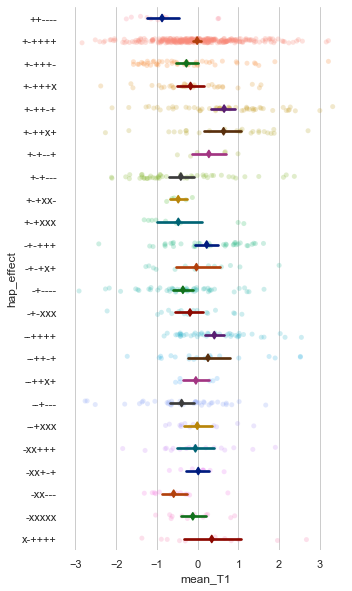

In [207]:
sns.set_theme(style="whitegrid")
## sort by count
data = df5[df5['hap_count'] > 5]
data = data.sort_values(by='hap_effect')
# Initialize the figure
f, ax = plt.subplots(figsize=(5,10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(data=data, y="hap_effect", x="mean_T1", dodge=True, alpha=.25,zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(data=data, y="hap_effect", x="mean_T1",join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None)

#plt.xticks(rotation=90)
plt.show()

In [208]:
f.savefig("phenotpye_by_haplotypes_all.png",dpi=300,bbox_inches = 'tight')

#### all groups by chr7hap

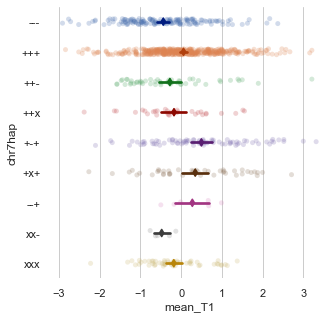

In [209]:
sns.set_theme(style="whitegrid")
## sort by count
data = df5[df5['hap_count'] > 5]
data = data.sort_values(by='hap_effect')
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(data=data, y="chr7hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(data=data, y="chr7hap", x="mean_T1",join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None)

#plt.xticks(rotation=90)
plt.show()

In [210]:
f.savefig("phenotpye_by_chr7_haplotypes_all.png",dpi=300,bbox_inches = 'tight')

#### group 3 by different chrosome haps

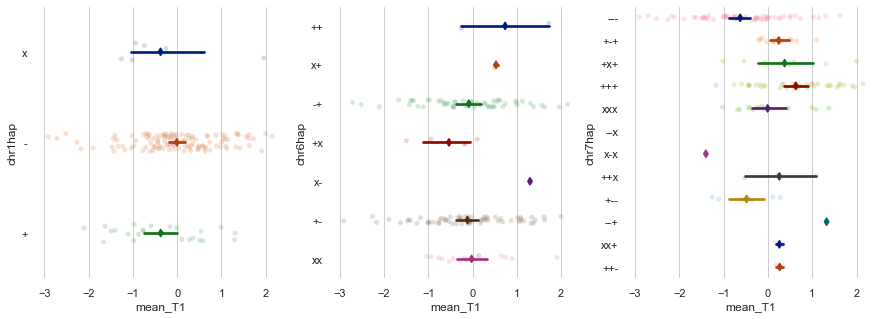

In [211]:
sns.set_theme(style="whitegrid")

data = df5[df5['group'] == 'G3'].sort_values(by='chr7hap')
hap_count = data['hap_effect'].value_counts().to_dict()
data['hap_count'] = data['hap_effect'].replace(hap_count)
data = data.sort_values(by='hap_count')
# Initialize the figure
f, ax = plt.subplots(1,3, figsize=(15,5))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(ax=ax[0], data=data, y="chr1hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)
sns.stripplot(ax=ax[1], data=data, y="chr6hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)
sns.stripplot(ax=ax[2], data=data, y="chr7hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(ax=ax[0],data=data, y="chr1hap", x="mean_T1", join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None)
sns.pointplot(ax=ax[1],data=data, y="chr6hap", x="mean_T1", join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None)
sns.pointplot(ax=ax[2],data=data, y="chr7hap", x="mean_T1", join=False, dodge=.8 - .8 / 3, palette="dark",
     markers="d", scale=.75, errorbar=None)

#plt.xticks(rotation=90)
plt.show()

In [212]:
f.savefig("phenotpye_by_haplotypes_G3.png",dpi=300,bbox_inches = 'tight')

#### crossing lines only, by different chromosome haps

/opt/anaconda3/envs/jupyter_seaborn/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


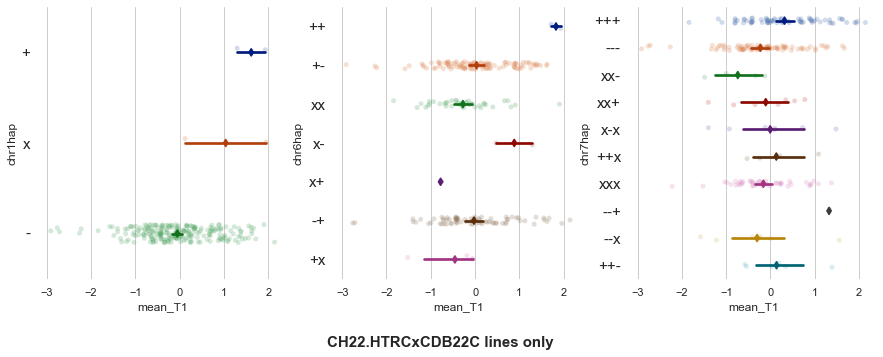

In [213]:
sns.set_theme(style="whitegrid")

data = df5[df5['category'] == 'CH22.HTRCxCDB22C']
hap_count = data['hap_effect'].value_counts().to_dict()
data['hap_count'] = data['hap_effect'].replace(hap_count)
data = data.sort_values(by='hap_count')
# Initialize the figure
f, ax = plt.subplots(1,3, figsize=(15,5))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(ax=ax[0], data=data, y="chr1hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)
#ax[0].set_title('Chr1 haps')
sns.stripplot(ax=ax[1], data=data, y="chr6hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)
#ax[1].set_title('Chr6 haps')
sns.stripplot(ax=ax[2], data=data, y="chr7hap", x="mean_T1", dodge=True, alpha=.25,zorder=1)
#ax[2].set_title('Chr7 haps')

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(ax=ax[0],data=data, y="chr1hap", x="mean_T1", join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None)
sns.pointplot(ax=ax[1],data=data, y="chr6hap", x="mean_T1", join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None)
sns.pointplot(ax=ax[2],data=data, y="chr7hap", x="mean_T1", join=False, dodge=.8 - .8 / 3, palette="dark",
     markers="d", scale=.75, errorbar=None)

#plt.xticks(rotation=90)
plt.setp(ax[0].get_yticklabels(), fontsize=15)
plt.setp(ax[1].get_yticklabels(), fontsize=15)
plt.setp(ax[2].get_yticklabels(), fontsize=15)

plt.text(-10, 12, 'CH22.HTRCxCDB22C lines only', fontsize=15,fontweight="bold")
plt.show()

In [214]:
f.savefig("phenotpye_by_haplotypes_crossing_lines.png",dpi=300,bbox_inches = 'tight')

In [215]:
df5.to_csv("haplotype_phenotype.csv")